<a href="https://colab.research.google.com/github/horsinnaround/Student-Performance/blob/main/work_19_gender_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from sklearn.feature_extraction.text import TfidfVectorizer
import numpy as np
from sklearn.decomposition import PCA
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import HistGradientBoostingClassifier,RandomForestClassifier,AdaBoostClassifier
from sklearn.svm import SVC, NuSVC
from sklearn import model_selection
from sklearn.metrics import plot_confusion_matrix, classification_report, confusion_matrix, cohen_kappa_score, roc_auc_score
from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score, jaccard_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import BaggingClassifier,BaggingClassifier,GradientBoostingClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis,QuadraticDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression,Ridge,RidgeCV,Lasso,LassoLars,BayesianRidge,TweedieRegressor
# Modeling
from keras.models import Sequential
from keras.layers import *
from keras import layers
from keras.callbacks import EarlyStopping
from sklearn.metrics import classification_report
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
!pip install catboost
from catboost import CatBoostClassifier
from xgboost import XGBClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.neighbors import RadiusNeighborsClassifier
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
import keras
import os
sns.set_context('notebook')
sns.set_theme(style="whitegrid")
sns.set_style('whitegrid')
# sns.set_palette('tab10')
plt.rcParams['figure.figsize'] = [10,6]
plt.rcParams['figure.dpi'] = 100
plt.rcParams['savefig.dpi'] = 100
# plt.rcParams['font.family'] = 'serif'
# plt.rcParams['font.serif'] = ['Times New Roman'] + plt.rcParams['font.serif']
# sns.set_context("paper")
path = '/content/drive/MyDrive/work 19 gender/results/'
# os.mkdir(path)

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 76.6/76.6 MB 6.8 MB/s eta 0:00:00


In [2]:
data = pd.read_csv('/content/drive/MyDrive/work 19 gender/gender-classifier-DFE-791531.csv',encoding='ISO-8859-1')
data

,_unit_id,_golden,_unit_state,_trusted_judgments,_last_judgment_at,gender,gender:confidence,profile_yn,profile_yn:confidence,created,...,profileimage,retweet_count,sidebar_color,text,tweet_coord,tweet_count,tweet_created,tweet_id,tweet_location,user_timezone
0,815719226,False,finalized,3,10/26/15 23:24,male,1.0000,yes,1.0,12/5/13 1:48,...,https://pbs.twimg.com/profile_images/414342229...,0,FFFFFF,Robbie E Responds To Critics After Win Against...,NaN,110964,10/26/15 12:40,6.587300e+17,main; @Kan1shk3,Chennai
1,815719227,False,finalized,3,10/26/15 23:30,male,1.0000,yes,1.0,10/1/12 13:51,...,https://pbs.twimg.com/profile_images/539604221...,0,C0DEED,ÛÏIt felt like they were my friends and I was...,NaN,7471,10/26/15 12:40,6.587300e+17,NaN,Eastern Time (US & Canada)
2,815719228,False,finalized,3,10/26/15 23:33,male,0.6625,yes,1.0,11/28/14 11:30,...,https://pbs.twimg.com/profile_images/657330418...,1,C0DEED,i absolutely adore when louis starts the songs...,NaN,5617,10/26/15 12:40,6.587300e+17,clcncl,Belgrade
3,815719229,False,finalized,3,10/26/15 23:10,male,1.0000,yes,1.0,6/11/09 22:39,...,https://pbs.twimg.com/profile_images/259703936...,0,C0DEED,Hi @JordanSpieth - Looking at the url - do you...,NaN,1693,10/26/15 12:40,6.587300e+17,"Palo Alto, CA",Pacific Time (US & Canada)
4,815719230,False,finalized,3,10/27/15 1:15,female,1.0000,yes,1.0,4/16/14 13:23,...,https://pbs.twimg.com/profile_images/564094871...,0,0,Watching Neighbours on Sky+ catching up with t...,NaN,31462,10/26/15 12:40,6.587300e+17,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20045,815757572,True,golden,259,NaN,female,1.0000,yes,1.0,8/5/15 21:16,...,https://pbs.twimg.com/profile_images/656793310...,0,C0DEED,"@lookupondeath ...Fine, and I'll drink tea too...",NaN,783,10/26/15 13:20,6.587400e+17,Verona ªÁ,NaN
20046,815757681,True,golden,248,NaN,male,1.0000,yes,1.0,8/15/12 21:17,...,https://pbs.twimg.com/profile_images/639815429...,0,0,Greg Hardy you a good player and all but don't...,NaN,13523,10/26/15 12:40,6.587300e+17,"Kansas City, MO",NaN
20047,815757830,True,golden,264,NaN,male,1.0000,yes,1.0,9/3/12 1:17,...,https://pbs.twimg.com/profile_images/655473271...,0,C0DEED,You can miss people and still never want to se...,NaN,26419,10/26/15 13:20,6.587400e+17,Lagos Nigeria,NaN
20048,815757921,True,golden,250,NaN,female,0.8489,yes,1.0,11/6/12 23:46,...,https://pbs.twimg.com/profile_images/657716093...,0,0,@bitemyapp i had noticed your tendency to pee ...,NaN,56073,10/26/15 12:40,6.587300e+17,Texas Hill Country,NaN


In [3]:
data.columns

Index(['_unit_id', '_golden', '_unit_state', '_trusted_judgments',
       '_last_judgment_at', 'gender', 'gender:confidence', 'profile_yn',
       'profile_yn:confidence', 'created', 'description', 'fav_number',
       'gender_gold', 'link_color', 'name', 'profile_yn_gold', 'profileimage',
       'retweet_count', 'sidebar_color', 'text', 'tweet_coord', 'tweet_count',
       'tweet_created', 'tweet_id', 'tweet_location', 'user_timezone'],
      dtype='object')

In [4]:
data = data[['text','gender','gender:confidence','_golden','fav_number','retweet_count','user_timezone']]

In [5]:
df = data[data['gender:confidence']==1]

In [6]:
gender = ['female','male']

In [7]:
df = df[df['gender'].isin(gender)]
df['gender'].value_counts()

female    5367
male      4653
Name: gender, dtype: int64

In [8]:
df.columns

Index(['text', 'gender', 'gender:confidence', '_golden', 'fav_number',
       'retweet_count', 'user_timezone'],
      dtype='object')

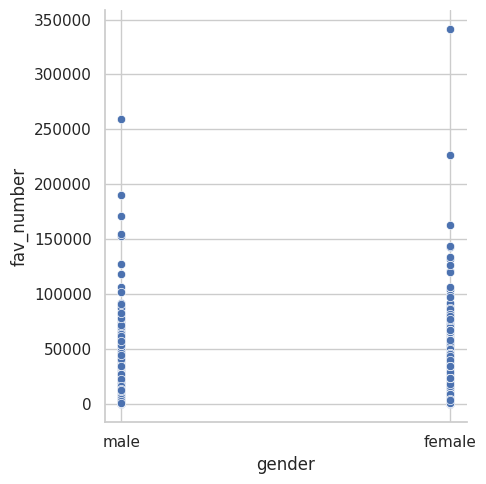

In [9]:
sns.relplot(data=df,y='fav_number',x='gender',kind='scatter')
# plt.xlim(0,1000)

In [10]:
# df[df['gender']=='male']['tweet_count'].describe()

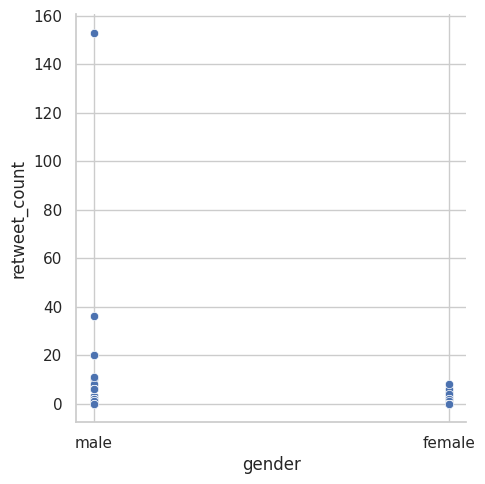

In [11]:
sns.relplot(data=df,y='retweet_count',x='gender',kind='scatter')


(array([-2.5,  0. ,  2.5,  5. ,  7.5, 10. , 12.5, 15. , 17.5, 20. ]),
 <a list of 10 Text major ticklabel objects>)

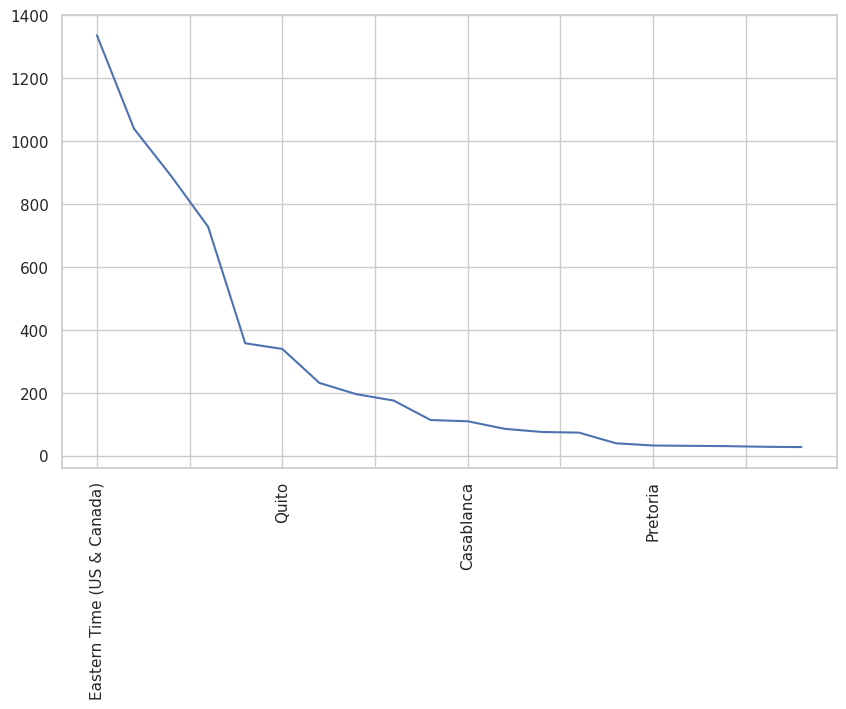

In [12]:
df['user_timezone'].value_counts()[0:20].plot()
plt.xticks(rotation=90)

In [13]:
data = df[['gender','text']]

In [14]:
data

,gender,text
0,male,Robbie E Responds To Critics After Win Against...
1,male,ÛÏIt felt like they were my friends and I was...
3,male,Hi @JordanSpieth - Looking at the url - do you...
4,female,Watching Neighbours on Sky+ catching up with t...
5,female,"Ive seen people on the train with lamps, chair..."
...,...,...
20044,female,Need A Ride Home From Practice _Ù÷Ô_Ù÷Ô_Ù÷ÔAnd...
20045,female,"@lookupondeath ...Fine, and I'll drink tea too..."
20046,male,Greg Hardy you a good player and all but don't...
20047,male,You can miss people and still never want to se...


In [15]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
stop = stopwords.words('english')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [16]:
import re

def  clean_text(df, text_field):
    df[text_field] = df[text_field].str.lower()
    df[text_field] = df[text_field].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))
    df[text_field] = df[text_field].apply(lambda elem: re.sub(r"'", "", elem)) 
    df[text_field] = df[text_field].apply(lambda elem: re.sub(r"(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)|^rt|http.+?", " ", elem))
    df[text_field] = df[text_field].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))
    df[text_field] = df[text_field].apply(lambda x: ' '.join([word for word in x.split() if len(word)>2 ]))
    # df[text_field] = df[text_field].apply(lambda elem: re.sub(r"([0-9])", " ", elem))  

    df[text_field] = df[text_field].apply(lambda elem: re.sub(r"  ", " ", elem))  

    return df
    # train = clean_text(train_,'OriginalTweet');

In [17]:
data = clean_text(data,'text');

<ipython-input-16-6ad986e20cf6>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[text_field] = df[text_field].str.lower()
<ipython-input-16-6ad986e20cf6>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[text_field] = df[text_field].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))
<ipython-input-16-6ad986e20cf6>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the cave

In [18]:
data

,gender,text
0,male,robbie responds critics win eddie edwards worl...
1,male,felt like friends living story retired ian1
3,male,looking url use typically see advanced user
4,female,watching neighbours sky catching neighbs xxx xxx
5,female,ive seen people train lamps chairs tvs etc
...,...,...
20044,female,need ride home practice raining hard asf
20045,female,fine ill drink tea love
20046,male,greg hardy good player get face dez bryant lea...
20047,male,miss people still never want see


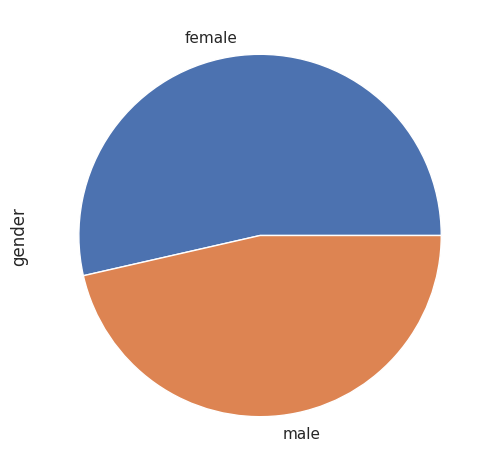

In [19]:
data['gender'].value_counts().plot(kind='pie')

In [20]:
data = data.sample(frac=1)

In [260]:
from sklearn.model_selection import train_test_split
data['class'] = data['gender'].factorize()[0]
dtr,dts,Y,y = train_test_split(data['text'],data['class'],test_size=0.25,random_state=148)
# del X,x
tfidf = TfidfVectorizer(sublinear_tf=True, min_df=5,norm='l2', ngram_range=(1,3),binary=True)
tfidffitted = tfidf.fit(data.text)
X = tfidffitted.transform(dtr).toarray()
x = tfidffitted.transform(dts).toarray()

X.shape,x.shape,y.shape,Y.shape

((7515, 3232), (2505, 3232), (2505,), (7515,))

In [23]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [56]:
g2 = df["retweet_count"]/df["retweet_count"].max()

In [ ]:
g2,g1

In [77]:
XP = np.zeros((Xp.shape[0],Xp.shape[1]+3))

4.379084967320261

In [80]:
XP[:,27] = g2
XP

array([[-0.0044911 , -0.01396114,  0.0131202 , ...,  0.        ,
         0.        ,  0.        ],
       [-0.00642496, -0.01706152,  0.00015349, ...,  0.        ,
         0.00019905,  0.        ],
       [-0.01596651, -0.02665917, -0.10261643, ...,  0.        ,
         0.0005913 ,  0.        ],
       ...,
       [-0.00101556, -0.01490433,  0.01403014, ...,  0.        ,
         0.00735611,  0.        ],
       [-0.00119265, -0.01706252,  0.02332071, ...,  0.        ,
         0.00014636,  0.        ],
       [-0.00133199, -0.01468554,  0.01035457, ...,  0.        ,
         0.00980033,  0.        ]])

In [261]:
tfidf = TfidfVectorizer(sublinear_tf=True, min_df=5,norm='l2', ngram_range=(1,3),binary=True)
tfidffitted = tfidf.fit(data.text)
X_ = tfidffitted.transform(data.text).toarray()
# x = tfidffitted.transform(dts).toarray()

X_.shape
# ,x.shape

(10020, 3232)

In [305]:
K = tfidffitted.vocabulary_

In [303]:
pd.DataFrame.from_dict(tfidffitted.vocabulary_)

ValueError: ignored

In [276]:
x1 = tfidffitted.transform(data[data['class']==1].text).toarray()
x0 = tfidffitted.transform(data[data['class']==0].text).toarray()



In [273]:
x1.shape

(4653, 3232)

In [277]:
x1.shape,x0.shape

((4653, 3232), (5367, 3232))

In [282]:
x1_ = x1.sum(axis=0)
x0_ = x0.sum(axis=0)

In [ ]:
plt.plot(x1_,label='Male')
plt.plot(x0_,label='Female')


In [285]:
M = pd.DataFrame()
M['Male'] = x1_
M['Female'] = x0_

In [290]:
# def hexbin(x, y, color, **kwargs):
#     cmap = sns.light_palette(color, as_cmap=True)
#     plt.hexbin(x, y, gridsize=15, cmap=cmap, **kwargs)

# with sns.axes_style("dark"):
#     g = sns.FacetGrid(H, hue="time", col="time", height=4)
# g.map(hexbin, "total_bill", "tip", extent=[0, 50, 0, 10]);

,Male,Female
0,2.843491,3.163452
1,6.710524,3.967448
2,1.527216,1.885571
3,2.068612,0.778974
4,1.562950,0.781334
...,...,...
3227,1.644538,0.980494
3228,4.314275,1.811582
3229,0.000000,1.969077
3230,2.512182,0.462577


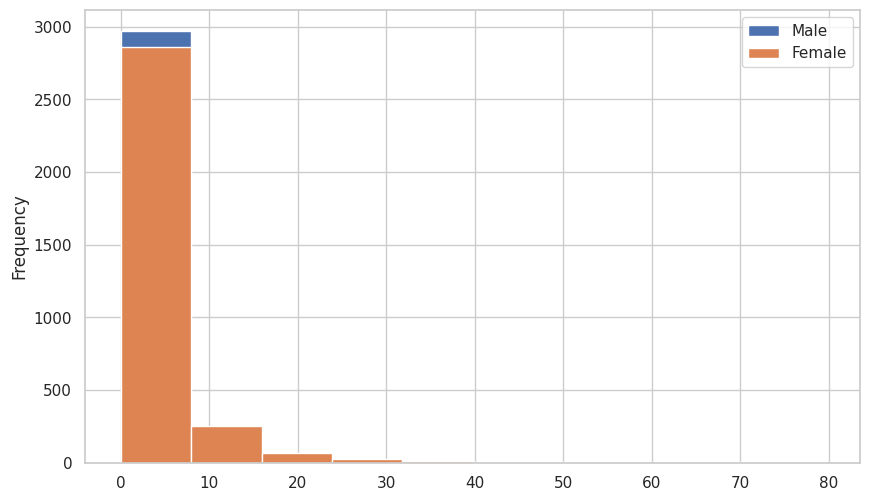

In [289]:
# M.plot(kind='hist')

In [106]:
X,x,Y,y = train_test_split(X_,data['class'],test_size=0.25,random_state=148)


In [96]:
pca = PCA(n_components=25)
Xp = pca.fit_transform(X_)
# xp = pca.transform(x)

In [97]:
X,x,Y,y = train_test_split(Xp,data['class'],test_size=0.25)
X.shape,x.shape,Y.shape,y.shape

((7515, 25), (2505, 25), (7515,), (2505,))

In [98]:
models = [LogisticRegression,XGBClassifier,SVC,RandomForestClassifier,AdaBoostClassifier]


In [99]:
n = 4
res = np.zeros((len(models)+1,4))
names = []
for k,i in enumerate(models):
  
  print(i().__class__.__name__)
  names.append(i().__class__.__name__)
  acc = 0
  f1 = 0
  prec = 0
  rec = 0
  for j in range(n):
    X,x,Y,y = train_test_split(Xp,data['class'],test_size=0.25)
    clf = i()
    clf.fit(X,Y)
    y_ = clf.predict(x)
    acc += accuracy_score(y,y_)
    f1 += f1_score(y,y_)
    rec += recall_score(y,y_)
    prec += precision_score(y,y_)
  res[k][0],res[k][1],res[k][2],res[k][3] = round(acc/n,5),round(rec/n,5),round(prec/n,5),round(f1/n,5)
  print(round(acc/n,5),round(rec/n,5),round(prec/n,5),round(f1/n,5))

LogisticRegression
0.54242 0.15525 0.538 0.2396
XGBClassifier
0.56048 0.39701 0.5285 0.45265
SVC
0.54531 0.25024 0.50571 0.32721
RandomForestClassifier
0.55369 0.44014 0.51373 0.47401
AdaBoostClassifier
0.5516 0.42741 0.52493 0.47048


In [101]:
res

array([[0.54242, 0.15525, 0.538  , 0.2396 ],
       [0.56048, 0.39701, 0.5285 , 0.45265],
       [0.54531, 0.25024, 0.50571, 0.32721],
       [0.55369, 0.44014, 0.51373, 0.47401],
       [0.5516 , 0.42741, 0.52493, 0.47048],
       [0.     , 0.     , 0.     , 0.     ]])

In [100]:
names

['LogisticRegression',
 'XGBClassifier',
 'SVC',
 'RandomForestClassifier',
 'AdaBoostClassifier']

In [102]:
# Modeling
from keras.models import Sequential
from keras.layers import *
from keras import layers
from keras.callbacks import EarlyStopping
from sklearn.metrics import classification_report


In [103]:
adam = tf.keras.optimizers.Adam(
    learning_rate=0.000001,
    beta_1=0.99,
    beta_2=0.999,
    epsilon=1e-09,

)

In [116]:
# Creating the deep learning model
tf.keras.backend.clear_session()
model = tf.keras.Sequential()
# model.add(Input( shape=(X.shape[1],)))
# model.add(layers.Conv1D(4, 2, activation='relu',input_shape=(X.shape[1],1),kernel_regularizer = tf.keras.regularizers.L2(0.0001)))
model.add(layers.Conv1D(28, 3, activation='relu',input_shape=(X.shape[1],1),kernel_regularizer = tf.keras.regularizers.L2(0.000001)))
model.add(Flatten())
# model.add(layers.AveragePooling1D(2))

model.add(layers.Dense(12,'relu',kernel_regularizer = tf.keras.regularizers.L2(0.000001)))
model.add(layers.Dropout(0.5))

model.add(layers.Dense(12,'relu',kernel_regularizer = tf.keras.regularizers.L2(0.0001)))
model.add(layers.Dropout(0.5))


model.add(layers.Dense(1, activation='sigmoid'))

model.summary()
model.compile(optimizer='rmsprop',loss='binary_crossentropy',metrics=['accuracy'])


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 3230, 28)          112       
                                                                 
 flatten (Flatten)           (None, 90440)             0         
                                                                 
 dense (Dense)               (None, 12)                1085292   
                                                                 
 dropout (Dropout)           (None, 12)                0         
                                                                 
 dense_1 (Dense)             (None, 12)                156       
                                                                 
 dropout_1 (Dropout)         (None, 12)                0         
                                                                 
 dense_2 (Dense)             (None, 1)                 1

In [117]:
num_epochs =24
early_stop = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)
history = model.fit(X,
                    Y,
                    batch_size=32,
                    epochs=num_epochs, 
                    validation_split=0.2,
                    # validation_data=[x,y],
                    callbacks =[early_stop],
                    # verbose=0
                    )
y_test = model.predict(x)
y_test = y_test.reshape(y_test.shape[0],)
y_test[y_test > 0.5] = 1
y_test[y_test < 0.5] = 0
y_pre = y_test
y_tre = y
# print(f"the accuracy is: {(y_pre==y_tre).sum()/y_pre.shape[0]}")
# accuracy_score(y_tre,y_pre), , , 
print(round(accuracy_score(y_tre,y_pre),5),round(recall_score(y_tre,y_pre),5),round(precision_score(y_tre,y_pre),5),round(f1_score(y_tre,y_pre),5))

Epoch 1/24
188/188 [==============================] - 12s 53ms/step - loss: 0.6939 - accuracy: 0.5243 - val_loss: 0.6913 - val_accuracy: 0.5336
Epoch 2/24
188/188 [==============================] - 10s 52ms/step - loss: 0.6907 - accuracy: 0.5286 - val_loss: 0.6877 - val_accuracy: 0.5336
Epoch 3/24
188/188 [==============================] - 10s 53ms/step - loss: 0.6823 - accuracy: 0.5294 - val_loss: 0.6823 - val_accuracy: 0.5336
Epoch 4/24
188/188 [==============================] - 10s 52ms/step - loss: 0.6708 - accuracy: 0.5697 - val_loss: 0.6803 - val_accuracy: 0.5749
Epoch 5/24
188/188 [==============================] - 10s 52ms/step - loss: 0.6591 - accuracy: 0.6065 - val_loss: 0.6799 - val_accuracy: 0.5808
Epoch 6/24
188/188 [==============================] - 10s 52ms/step - loss: 0.6498 - accuracy: 0.6236 - val_loss: 0.6822 - val_accuracy: 0.5689
Epoch 7/24
188/188 [==============================] - 10s 53ms/step - loss: 0.6437 - accuracy: 0.6349 - val_loss: 0.6854 - val_accuracy:

In [118]:
res[-1][0],res[-1][1],res[-1][2],res[-1][3] = round(accuracy_score(y_tre,y_pre),5),round(recall_score(y_tre,y_pre),5),round(precision_score(y_tre,y_pre),5),round(f1_score(y_tre,y_pre),5)

In [119]:
res

array([[0.54242, 0.15525, 0.538  , 0.2396 ],
       [0.56048, 0.39701, 0.5285 , 0.45265],
       [0.54531, 0.25024, 0.50571, 0.32721],
       [0.55369, 0.44014, 0.51373, 0.47401],
       [0.5516 , 0.42741, 0.52493, 0.47048],
       [0.602  , 0.4316 , 0.58076, 0.49519]])

In [120]:
ll = pd.DataFrame(res,columns=['accuracy','preccision','recall','f1'])

In [123]:
names.append('ConvolutionalNN')

In [121]:
ll.to_csv(f'{path}res.csv',index=False)

In [124]:
from keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
import numpy as np

In [128]:
data['length'] = data['text'].str.split().apply(len)

In [130]:
data['length'].max()

20

In [132]:
maxlen = 20
max_words = 300
tokenizer = Tokenizer(num_words=max_words)
tokenizer.fit_on_texts(data.text)
Xsequences = tokenizer.texts_to_sequences(data.text)
# xsequences = tokenizer.texts_to_sequences(test.OriginalTweet)

In [133]:
trainpadded = pad_sequences(Xsequences, maxlen=maxlen)
# testpadded = pad_sequences(xsequences, maxlen=maxlen)

In [134]:
embedding_dim = 18

In [135]:
X,x,Y,y = train_test_split(trainpadded,data['class'],test_size=0.25)
X.shape,x.shape,Y.shape,y.shape

((7515, 20), (2505, 20), (7515,), (2505,))

In [221]:
from keras.models import Sequential
from keras.layers import Embedding, Flatten, Dense,Conv1D,GlobalAveragePooling1D,Dropout,MaxPooling1D,ConvLSTM1D,LSTM
model = Sequential()
model.add(Embedding(max_words, embedding_dim, input_length=maxlen))
# model.add(ConvLSTM1D(32, 2, activation='relu'))
# model.add(LSTM(32,return_sequences=True ))

# model.add(LSTM(100,return_sequences=True ))
# model.add(LSTM(100))
model.add(Conv1D(filters=32, kernel_size=2, padding='same', activation='relu'))
model.add(MaxPooling1D(pool_size=2))
model.add(LSTM(100,activation='relu'))
# model.add(MaxPooling1D(2))
# model.add(Conv1D(48, 2, activation='relu'))
# model.add(MaxPooling1D(2))
# model.add(Conv1D(128, 2, activation='relu'))
# model.add(Flatten())
# model.add(GlobalAveragePooling1D())
# model.add(Dense(32, activation='relu',kernel_regularizer = tf.keras.regularizers.L2(0.0001)))
# model.add(Dense(24, activation='relu',kernel_regularizer = tf.keras.regularizers.L2(0.0001)))

# model.add(Dropout(0.3))
model.add(Dense(12, activation='relu',kernel_regularizer = tf.keras.regularizers.L2(0.0001)))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))
model.summary()
model.compile(optimizer='rmsprop',loss='binary_crossentropy',metrics=['accuracy'])

Model: "sequential_31"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_30 (Embedding)    (None, 20, 18)            5400      
                                                                 
 conv1d_16 (Conv1D)          (None, 20, 32)            1184      
                                                                 
 max_pooling1d_15 (MaxPoolin  (None, 10, 32)           0         
 g1D)                                                            
                                                                 
 lstm_28 (LSTM)              (None, 100)               53200     
                                                                 
 dense_73 (Dense)            (None, 12)                1212      
                                                                 
 dropout_45 (Dropout)        (None, 12)                0         
                                                     

In [222]:
num_epochs =24
early_stop = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)
history = model.fit(X,
                    Y,
                    batch_size=32,
                    epochs=num_epochs, 
                    validation_split=0.2,
                    # validation_data=[x,y],
                    callbacks =[early_stop],
                    # verbose=0
                    )
y_test = model.predict(x)
y_test = y_test.reshape(y_test.shape[0],)
y_test[y_test > 0.5] = 1
y_test[y_test < 0.5] = 0
y_pre = y_test
y_tre = y
# print(f"the accuracy is: {(y_pre==y_tre).sum()/y_pre.shape[0]}")
# accuracy_score(y_tre,y_pre), , , 
print(round(accuracy_score(y_tre,y_pre),5),round(recall_score(y_tre,y_pre),5),round(precision_score(y_tre,y_pre),5),round(f1_score(y_tre,y_pre),5))

Epoch 1/24
188/188 [==============================] - 7s 16ms/step - loss: 0.6928 - accuracy: 0.5366 - val_loss: 0.6909 - val_accuracy: 0.5316
Epoch 2/24
188/188 [==============================] - 3s 14ms/step - loss: 0.6874 - accuracy: 0.5388 - val_loss: 0.6835 - val_accuracy: 0.5316
Epoch 3/24
188/188 [==============================] - 3s 14ms/step - loss: 0.6836 - accuracy: 0.5388 - val_loss: 0.6833 - val_accuracy: 0.5316
Epoch 4/24
188/188 [==============================] - 3s 13ms/step - loss: 0.6787 - accuracy: 0.5388 - val_loss: 0.6826 - val_accuracy: 0.5316
Epoch 5/24
188/188 [==============================] - 3s 14ms/step - loss: 0.6743 - accuracy: 0.5388 - val_loss: 0.6828 - val_accuracy: 0.5316
Epoch 6/24
188/188 [==============================] - 3s 14ms/step - loss: 0.6737 - accuracy: 0.5536 - val_loss: 0.6825 - val_accuracy: 0.5502
Epoch 7/24
188/188 [==============================] - 3s 14ms/step - loss: 0.6698 - accuracy: 0.5615 - val_loss: 0.6916 - val_accuracy: 0.5476

In [223]:
# res2 = np.zeros((res.shape[0]+1,res.shape[1]))
# res2[0:-1,:] = res

res2[-1][0],res2[-1][1],res2[-1][2],res2[-1][3] = round(accuracy_score(y_tre,y_pre),5),round(recall_score(y_tre,y_pre),5),round(precision_score(y_tre,y_pre),5),round(f1_score(y_tre,y_pre),5)
res2

array([[0.54242, 0.15525, 0.538  , 0.2396 ],
       [0.56048, 0.39701, 0.5285 , 0.45265],
       [0.54531, 0.25024, 0.50571, 0.32721],
       [0.55369, 0.44014, 0.51373, 0.47401],
       [0.5516 , 0.42741, 0.52493, 0.47048],
       [0.602  , 0.4316 , 0.58076, 0.49519],
       [0.56048, 0.61054, 0.52755, 0.56602]])

In [228]:
names.append('ConvLSTM')

In [238]:
names

['LogisticRegression',
 'XGBClassifier',
 'SVC',
 'RandomForestClassifier',
 'AdaBoostClassifier',
 'ConvolutionalNN',
 'ConvLSTM']

In [241]:
names = ["LR",'XGB','SVC',"RF",'Ada','CNN','ConvLSTM']

In [242]:
H["Model"] = names

In [243]:
H.index = names

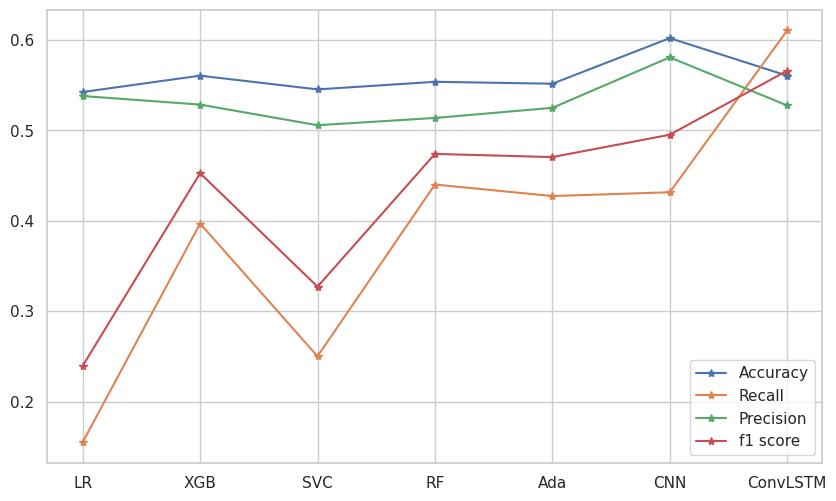

In [259]:
H.plot(marker='*')
plt.xticks(rotation=0)
plt.savefig('/content/drive/MyDrive/work 19 gender/overal.png',bbox_inches='tight')

In [231]:
H = pd.DataFrame(res2,columns=['Accuracy','Recall','Precision','f1 score'])

In [255]:
H.to_csv('/content/drive/MyDrive/work 19 gender/results.csv')

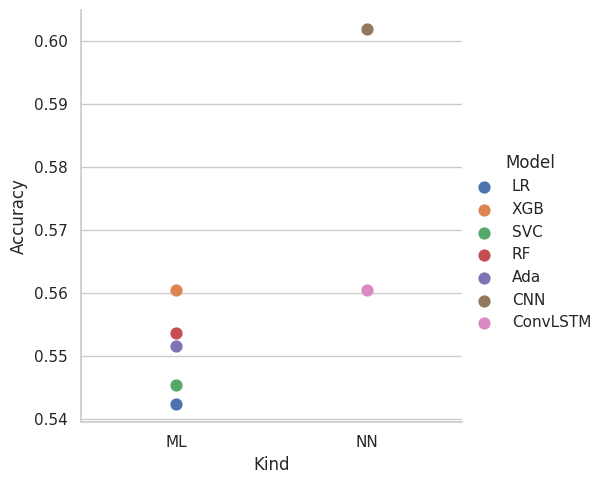

In [253]:
# plt.figure(figsize=(12,8))
sns.catplot(
    data=H, x="Kind", y="Accuracy", hue="Model",
    # palette={"male": "g", "female": "m"},
    # markers=["^", "o"], linestyles=["-", "--"],
    kind="point"
)
plt.savefig('/content/drive/MyDrive/work 19 gender/Accuracy.png',bbox_inches='tight')

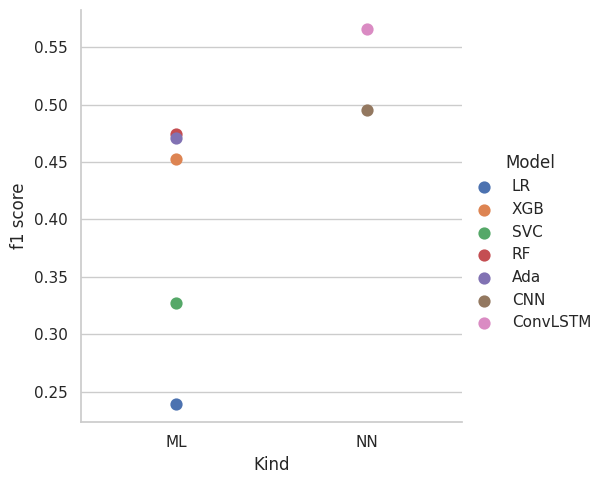

In [254]:

sns.catplot(
    data=H, x="Kind", y="f1 score", hue="Model",
    # palette={"male": "g", "female": "m"},
    # markers=["^", "o"], linestyles=["-", "--"],
    kind="point"
)
plt.savefig('/content/drive/MyDrive/work 19 gender/f1Score.png',bbox_inches='tight')

In [248]:
H["Kind"] = ['ML','ML','ML','ML','ML',"NN","NN"]

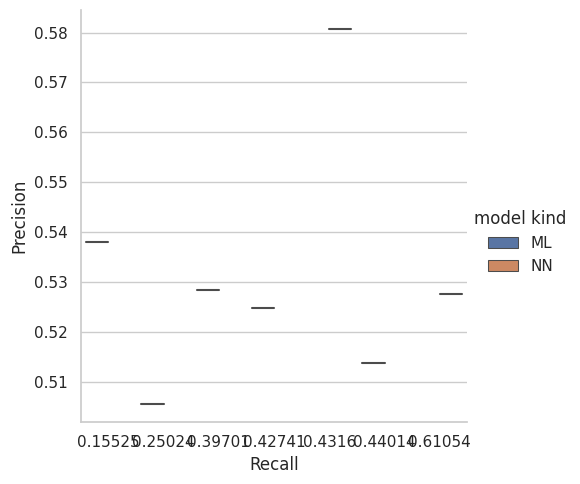

In [247]:
sns.catplot(
    data=H, x="Recall", y="Precision", hue="model kind",
    kind="violin", split=True,
)

/usr/local/lib/python3.8/dist-packages/seaborn/categorical.py:1296: UserWarning: 40.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/categorical.py:1296: UserWarning: 93.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/categorical.py:1296: UserWarning: 98.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/categorical.py:1296: UserWarning: 99.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/categorical.py:1296: UserWarning: 99.2% of the points cannot be placed; y

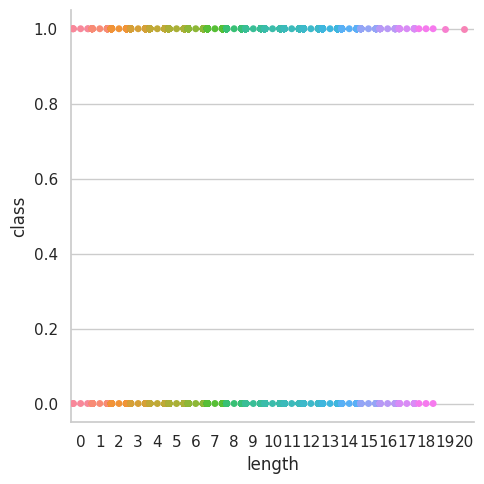

In [175]:

sns.catplot(data=data, x="length", y="class", kind="swarm")

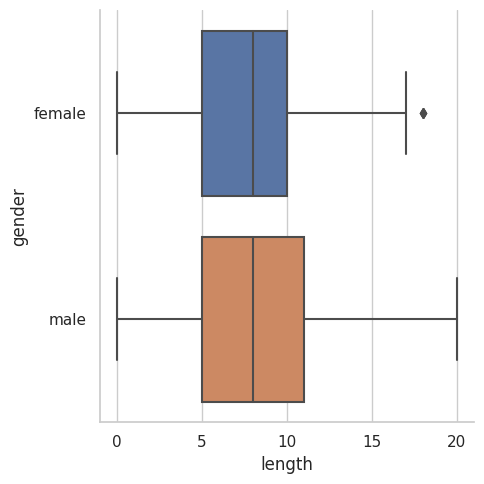

In [178]:
sns.catplot(data=data, x="length", y="gender", kind="box")

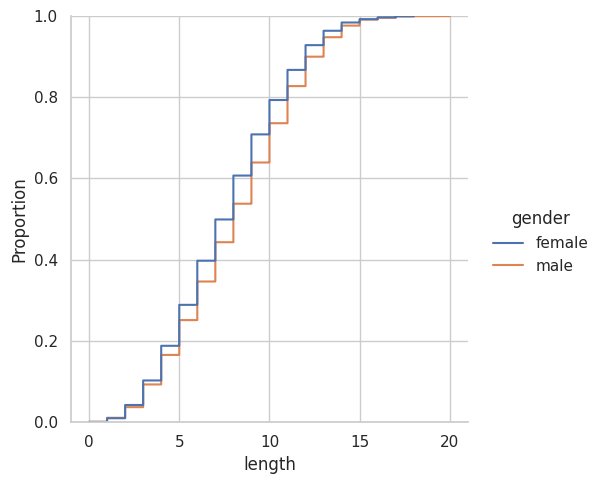

In [179]:
sns.displot(data, x="length", hue="gender", kind="ecdf")

In [195]:
df.columns

Index(['text', 'gender', 'gender:confidence', '_golden', 'fav_number',
       'retweet_count', 'user_timezone'],
      dtype='object')

In [201]:
df['fav_number'].max()

341621

In [293]:
M

,Male,Female
0,2.843491,3.163452
1,6.710524,3.967448
2,1.527216,1.885571
3,2.068612,0.778974
4,1.562950,0.781334
...,...,...
3227,1.644538,0.980494
3228,4.314275,1.811582
3229,0.000000,1.969077
3230,2.512182,0.462577


In [345]:
M.to_csv('/content/drive/MyDrive/work 19 gender/results/m.csv')

(0.0, 30.0)

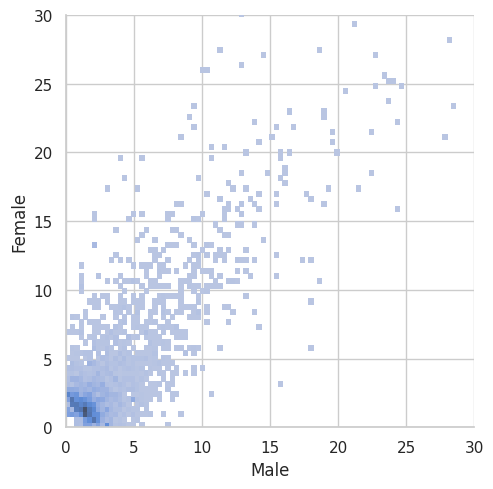

In [295]:
sns.displot(M, x="Male", y="Female")
plt.xlim(0,30)
plt.ylim(0,30)


In [ ]:
KK = {i:j for j,i in K.items()}
KK

In [311]:
M['Me'] = M['Male'] - M['Female']
M['Fe'] = M['Female'] - M['Male']


In [325]:
LL = M.sort_values(by='Female',ascending=False)[0:20].index

In [326]:
# M.sort_values(by='Me',ascending=False)[0:20]['Male']

In [328]:
# malelike = []
# male
for l in LL:
  print(KK[l])

like
get
love
one
day
time
best
people
got
know
want
still
good
amp
back
cant
lol
need
new
ive


In [335]:
feMalelike = []
feMalecount = []
LL = M.sort_values(by='Female',ascending=False)[0:20].index
for l in LL:
  feMalelike.append(KK[l])
  feMalecount.append(M.loc[l].Male)
  print(KK[l],M.loc[l].Female)

like 79.5867543220171
get 70.90930832524968
love 70.73396493393548
one 66.63826059475359
day 61.563479158610804
time 54.42925291314431
best 50.55071085618402
people 48.97697888880024
got 45.821802613726774
know 45.411521185421634
want 43.855487395766566
still 42.03508838910812
good 41.864480956360495
amp 41.70461276378193
back 41.681346497693255
cant 39.71900364668805
lol 38.13710752301083
need 37.74177060369223
new 37.56476894722457
ive 36.782945850692066


In [336]:
Malelike = []
Malecount = []
LL = M.sort_values(by='Male',ascending=False)[0:20].index
for l in LL:
  Malelike.append(KK[l])
  Malecount.append(M.loc[l].Male)
  print(KK[l],M.loc[l].Male)

like 61.80628826552056
get 60.6386378968268
one 50.03313162154249
time 46.60925846153572
new 42.964783769544766
good 40.23138379629056
love 39.88643031692428
know 39.343935540401205
see 38.77331556749244
think 38.70318389058913
people 37.53317862915644
got 37.3815031380313
back 36.02669627245361
best 35.36027438848006
game 34.08083506029176
day 32.36413804821266
amp 31.69577620229784
well 31.545746651542053
lol 31.2411915619199
thats 30.882852807081427


In [337]:
LK = pd.DataFrame()
LK['Malelike'] = Malelike
LK['Malecount'] = Malecount
LK['feMalelike'] = feMalelike
LK['feMalecount'] = feMalecount

# Malelike
# Malecount
# feMalelike
# feMalecount/

In [338]:
LK.to_csv('/content/drive/MyDrive/work 19 gender/results/LK.csv')

In [339]:
ljk = [i for i,j in KK.items()]

In [343]:
M['Word'] = ljk

In [309]:
KK

{3108: 'went',
 2786: 'target',
 2844: 'things',
 631: 'course',
 565: 'come',
 871: 'end',
 2636: 'spending',
 2229: 'problem',
 2395: 'ross',
 1214: 'good',
 3210: 'yeah',
 1732: 'lots',
 456: 'catch',
 3206: 'xxx',
 2376: 'right',
 2027: 'one',
 3124: 'whoever',
 2271: 'puts',
 1286: 'hand',
 2228: 'probably',
 288: 'bit',
 1641: 'less',
 2845: 'think',
 3103: 'weird',
 2099: 'people',
 2338: 'relax',
 1123: 'friendship',
 579: 'company',
 1230: 'gotta',
 1558: 'kim',
 1128: 'fuck',
 1981: 'night',
 1210: 'gonna',
 1904: 'move',
 205: 'back',
 1379: 'home',
 1958: 'new',
 3223: 'york',
 1520: 'join',
 147: 'army',
 1967: 'new york',
 2938: 'tried',
 3102: 'weight',
 3174: 'world',
 2972: 'two',
 1289: 'hands',
 1300: 'happy',
 286: 'birthday',
 512: 'childhood',
 245: 'beauty',
 2577: 'smith',
 2822: 'thank',
 2799: 'teaching',
 1302: 'happy birthday',
 69: 'aint',
 1875: 'missed',
 240: 'beat',
 2396: 'roster',
 414: 'came',
 2019: 'often',
 1911: 'much',
 680: 'damage',
 2286: 'qu